Matemática Computacional III - UFSM - 2023/1

# Equações Diferenciais Ordinárias

<br>

Nas últimas aulas, viemos estudando maneiras de aproximar a solução de um problema de valor inicial, ou seja, como aproximar uma função $y$ que satisfaz

$$\begin{cases} 
   y' = f(x,y) \\
   y(x_0) = y_0
  \end{cases}.$$

Lembramos que o método de Euler utiliza a aproximação

$$ y(x) \approx y(x_0) + y'(x_0)h$$

enquanto que o método de Taylor de ordem 2 usa

$$ y(x) \approx y(x_0) + y'(x_0)h + y''(x_0)\frac{h^2}{2!},$$

onde $h=x-x_0$ é a distância entre $x$ e $x_0$, a que chamamos de passo.

Uma desvantagem do método de Taylor é que ele utiliza derivadas de ordem superior (no caso acima, $y''$). 

Nesse sentido, os métodos de Runge-Kutta são atraentes, pois usam usam apenas a derivada primeira, $y'=f(x,y)$, e tipicamente fornecem uma aproximação melhor que o método de Euler.

<br>

***
<br>

# Métodos de Runge-Kutta

O método de Runge-Kutta de ordem 1 é idêntico ao método de Euler,

\begin{align}
y(x) &\approx y(x_0) + h\cdot y'(x_0)\\
&= y(x_0) + h\cdot f(x_0, y_0).
\end{align}

Porém, ao aumentarmos a ordem, vamos substituindo $f(x_0, y_0)$ por uma **média ponderada de valores que $f$ assume em diferentes pontos**.

## Runge-Kutta de ordem 2

No caso em que substituímos $f(x_0, y_0)$ por uma média de dois valores, 

$$\frac{f(x_0, y_0)+f(x_0+h, y_0+h\cdot f(x_0, y_0))}{2},$$

obtemos o **método de Runge-Kutta de ordem 2**. 

Note que nesse caso podemos escrever

\begin{equation}\label{rk2}
y(x_{n+1}) = y(x_n) + h\cdot \frac{(k_1+k_2)}{2},
\end{equation}

com

$$ k_1 = f(x_n, y_n)$$

$$ k_2 = f(x_n+h, y(x_n)+h\cdot k_1).$$

Esses valores de $k_1, k_2$ são obtidos ao compararmos a expressão acima com a série de Taylos da função $f(x, y)$.

Esse método também é conhecido como **método de Euler aperfeiçoado**.


<br>

***
<br>

### Exercício 1

Usando o método de Runge-Kutta de ordem 2, aproxime a solução do PVI definido por:

$$\begin{cases} 
   y' = f(x,y)=x-y+2 \\
   y(x_0)= y(0) = 2
  \end{cases}$$

com $x \in [a,b] = [0,0.5]$ e usando 4 subintervalos. Calcule a solução exata e compare seu gráfico com as aproximações.

In [3]:
# calcule aqui a solução exata
import numpy as np
import matplotlib.pyplot as plt
passo = (0.5-0)/4
dom = np.arange(0, 0.5+passo, passo)
sol = [2]
for n in dom[:-1]:
  
  y = n+1+(1/np.exp(n))
  sol.append(y)
  print('x:', n, ', y aproximado:', y)

x: 0.0 , y aproximado: 2.0
x: 0.125 , y aproximado: 2.0074969025845952
x: 0.25 , y aproximado: 2.028800783071405
x: 0.375 , y aproximado: 2.0622892787909723


Assim, para que $y(0)=2$, o valor da constante $C_1$ deve ser

$$ C_1 = 1. $$

In [4]:
# defina aqui a discretização do intervalo estudado, denotando-a por X2
X2 = np.arange(0, 0.5+passo, passo)

print ('Discretização:', X2)

Discretização: [0.    0.125 0.25  0.375 0.5  ]


In [5]:
# definindo a função f(x, y)
f = lambda x, y: x-y+2

# definindo uma lista inicializada com o valor inicial de y
Y2 = [2]

# implementando o método de Runge-Kutta ordem 2
for n in range(len(X2) - 1):    
    print('x:', X2[n], ', y aproximado:', Y2[n])
    k1 = f(X2[n], Y2[n])
    k2 = f(X2[n]+passo, Y2[n]+ passo*k1)
    y = Y2[-1] + passo*((k1+k2)/2)
    Y2.append(y)

x: 0.0 , y aproximado: 2
x: 0.125 , y aproximado: 2.0078125
x: 0.25 , y aproximado: 2.02935791015625
x: 0.375 , y aproximado: 2.0630269050598145


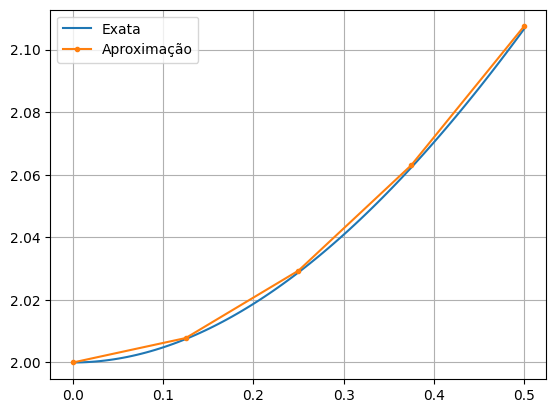

In [6]:
# plotando os gráficos da solução exata e da aproximação


dom = np.linspace(0, 0.5, 100) 
plt.plot(dom, dom+1+(1/np.exp(dom)), "-", label='Exata') 
plt.plot(X2, Y2, ".-", label="Aproximação") 
plt.grid()
plt.legend()
plt.show()

<br>

***
<br>

## Runge-Kutta de ordem 3

No método de Runge-Kutta ordem 3, utilizamos uma média ponderada de $f(x,y)$ em três valores distintos:

$$ y(x_{n+1}) =y(x_n) + h\cdot\frac{2k_1 + 3k_2 + 4k_3}{9}, $$ 

com

$$ k_1 = f(x_n , y(x_n)),$$

$$ k_2 = f(x_n + \frac{1}{2}h, y(x_n) + \frac{1}{2}hk_1), $$

$$ k_3 = f(x_n + \frac{3}{4}h, y(x_n) + \frac{3}{4}hk_2) .$$

Novamente, as funções $k_1, k_2, k_3$ podem ser obtidas comparando a expressão acima com a série de Taylor da função $f(x, y)$.

### Exercício 2

a) Adapte o código acima para obter uma discretização `X3` e uma lista `Y3` que aproxime a solução do PVI anterior utilizando o método de Runge-Kutta de ordem 3. 

In [7]:
# resolva aqui
passo = (0.5-0)/4
X3 = np.arange(0, 0.5+passo, passo)

print ('Discretização:', X3)

# definindo a função f(x, y)
f = lambda x, y: x-y+2

# definindo uma lista inicializada com o valor inicial de y
Y3 = [2]

# implementando o método de Runge-Kutta ordem 2
for n in range(len(X3) - 1):    
    print('x:', X3[n], ', y aproximado:', Y3[n])
    k1 = f(X3[n], Y3[n])
    k2 = f(X3[n]+(1/2)*passo, Y3[n]+(1/2)*passo*k1)
    k3 = f(X3[n]+(3/4)*passo, Y3[n] + (3/4)*passo*k2)
    y = Y3[-1] + passo*((2*k1+3*k2+4*k3)/9)
    Y3.append(y)

Discretização: [0.    0.125 0.25  0.375 0.5  ]
x: 0.0 , y aproximado: 2
x: 0.125 , y aproximado: 2.0074869791666665
x: 0.25 , y aproximado: 2.028783268398709
x: 0.375 , y aproximado: 2.0622660939547197


b) Plote essa nova aproximação juntamente com a anterior e a solução exata do problema. Coloque uma legenda em cada gráfico, indicando qual foi gerado por qual método.

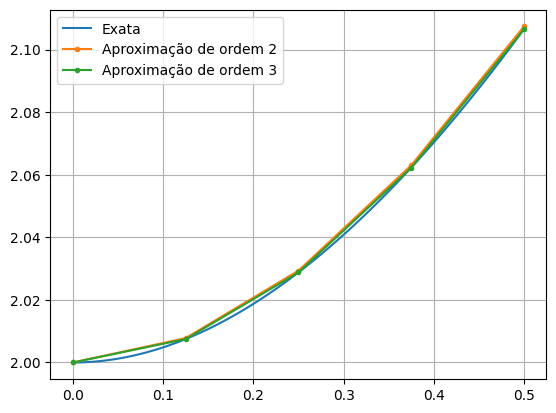

In [11]:
# resolva aqui
dom = np.linspace(0, 0.5, 100) 
plt.plot(dom, dom+1+(1/np.exp(dom)), "-", label='Exata') 
plt.plot(X2, Y2, ".-", label="Aproximação de ordem 2")
plt.plot(X3, Y3, ".-", label="Aproximação de ordem 3")  
plt.grid()
plt.legend()
plt.show()

c) Compare numericamente os erros gerados por cada uma dos métodos, calculando as diferenças $|y_{exata}(x) - y_{aprox}(x)|$ nos pontos da discretização para cada método.

In [9]:
# resolva aqui
erro1 = np.subtract(sol, Y2)
erro2 = np.subtract(sol, Y3)
print('O erro para a Ordem 2 é ', erro1)
print('O erro para a Ordem 3 é ', erro2)

O erro para a Ordem 2 é  [ 0.         -0.0078125  -0.02186101 -0.03422612 -0.04510947]
O erro para a Ordem 3 é  [ 0.         -0.00748698 -0.02128637 -0.03346531 -0.0442141 ]


<br><br>

***
<br><br>

### Descreva brevemente com suas palavras como funcionam os métodos de Runge-Kutta.
Ao invés de diferenciar uma segunda vez a edo para poder resolver, como o método de Taylor faz, o método de Runge Kutta toma um valor de passo e o soma nas variáveis da derivada de primeira ordem f(x,y) e calcula a média entre f(x,y) e f(x+passo,y+passo)
